<a href="https://colab.research.google.com/github/sidwat/conversational_bot/blob/master/second_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [206]:
with open('/content/yelp_labelled.txt', 'r') as text:
  data1 = text.read()
data1 = data1.split('\n')
print(data1)

['Wow... Loved this place.\t1', 'Crust is not good.\t0', 'Not tasty and the texture was just nasty.\t0', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1', 'The selection on the menu was great and so were the prices.\t1', 'Now I am getting angry and I want my damn pho.\t0', "Honeslty it didn't taste THAT fresh.)\t0", 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0', 'The fries were great too.\t1', 'A great touch.\t1', 'Service was very prompt.\t1', 'Would not go back.\t0', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0', 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1', 'I was disgusted because I was pretty sure that was human hair.\t0', 'I was shocked because no signs indicate cash only.\t0', 'Highly recommended.\t1', 'Waitress was a little slow in service.\t0', 'This place is not worth your time, let al

In [207]:
with open('/content/amazon_cells_labelled.txt', 'r') as text:
  data2 = text.read()
data2 = data2.split('\n')
print(data2)

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0', 'Good case, Excellent value.\t1', 'Great for the jawbone.\t1', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0', 'The mic is great.\t1', 'I have to jiggle the plug to get it to line up right to get decent volume.\t0', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0', 'If you are Razr owner...you must have this!\t1', 'Needless to say, I wasted my money.\t0', 'What a waste of money and time!.\t0', 'And the sound quality is great.\t1', 'He was very impressed when going from the original battery to the extended battery.\t1', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0', 'Very good quality though\t1', 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0', 'Highly recommend for any one who has a blue to

In [208]:
sentences = []
for line in data1:
  l = line.split('\t')
  sentence = l[0]
  sentences.append(sentence)
for line in data2:
  l = line.split('\t')
  sentence = l[0]
  sentences.append(sentence)
print(len(sentences))


2002


In [209]:
s = []
with open('/content/ara_eng.txt', 'r') as text:
  s = text.read().split('\n')
print(len(s))

24639


In [210]:
for line in s:
  sentence = line.split('\t')[0]
  if ' ' in sentence:
    sentences.append(sentence)
print(sentences[2052:2065])

['I got it.', 'I got it.', 'I use it.', "I'll pay.", "I'm busy.", "I'm busy.", "I'm cold.", "I'm free.", "I'm here.", "I'm home.", "I'm poor.", "I'm rich.", 'It hurts.']


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

In [0]:
sent = []
for se,l in imdb['train']:
  sent.append(str(se.numpy()))
for se, l in imdb['test']:
  sent.append(str(se.numpy()))


In [213]:
print(sent[:53])

['b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."', "b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot develo

In [214]:
for line in sent:
  a = line.split('.')
  for l in a:
    sentences.append(l)
print(len(sentences))

726929


In [0]:

with open('/content/some_data.txt') as textfile:
  s = textfile.read().split('.')
for line in s:
  newline = line.replace("urlLink ", "")
  if '2001' in line:
    sentences.append(newline.partition('2001')[2])
  else:
    sentences.append(newline)

In [216]:
print(len(sentences))

727115


In [220]:
count = 0
for l in sentences:
  if not any(i.isalpha() for i in l):
    count +=1
print(count)

98087


In [0]:
from typing import List, Union, Tuple, Dict
from collections import defaultdict

from keras.preprocessing.text import Tokenizer
def tokenize(lines: List[str], num_words=10000, unknown_token = '<OOV>') -> Tuple[List[List], Tokenizer, Dict]:
    tokenizer = Tokenizer(num_words=num_words, oov_token=unknown_token)
    tokenizer.fit_on_texts(lines)
    word_index = tokenizer.word_index

    sequences = tokenizer.texts_to_sequences(lines)

    return sequences, tokenizer, word_index


def bigram_count(token_list: List[int], window_size: int, cache: defaultdict):
    sentence_size = len(token_list)

    for central_index, central_word_id in enumerate(token_list):
        for distance in range(1, window_size + 1):
            if central_index + distance < sentence_size:
                first_id, second_id = sorted([central_word_id, token_list[central_index + distance]])
                cache[first_id][second_id] += 1.0 / distance


def build_cooccurrences(sequences: List[List[int]], cache: defaultdict, window=3):
    for seq in sequences:
        bigram_count(token_list=seq, cache=cache, window_size=window)


def cache_to_pairs(cache: defaultdict) -> Union[np.array, np.array, np.array]:
    first, second, x_ijs = [], [], []

    for first_id in cache.keys():

        for second_id in cache[first_id].keys():

            x_ij = cache[first_id][second_id]

            # add (main, context) pair
            first.append(first_id)
            second.append(second_id)
            x_ijs.append(x_ij)

            # add (context, main) pair
            first.append(second_id)
            second.append(first_id)
            x_ijs.append(x_ij)

    return np.array(first), np.array(second), np.array(x_ijs)

In [0]:
sequences, tokenizer, word_index = tokenize(sentences, num_words = 10000, unknown_token='<OOV>')

In [224]:
print(len(sequences))

727115


In [225]:
print(sentences[8900])
print(sequences[8900])

He was wounded in the shoulder.
[27, 14, 4523, 9, 2, 5104]


In [0]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
cache = nested_dict(2, float)

In [0]:
build_cooccurrences(sequences, cache, window = 5)

In [0]:
first, second, x_ijs = cache_to_pairs(cache)

In [0]:
from keras.layers import Input, Embedding, Dot, Reshape, Add
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K


X_MAX = 100
a = 3.0 / 4.0


def glove_model(vocab_size=10, vector_dim=3):
    input_target = Input((1,), name='central_word_id')
    input_context = Input((1,), name='context_word_id')

    central_embedding = Embedding(vocab_size, vector_dim, input_length=1, name='central_embeddings')
    central_bias = Embedding(vocab_size, 1, input_length=1, name='central_biases')

    context_embedding = Embedding(vocab_size, vector_dim, input_length=1, name='context_embeddings')
    context_bias = Embedding(vocab_size, 1, input_length=1, name='context_biases')

    vector_target = central_embedding(input_target)
    vector_context = context_embedding(input_context)

    bias_target = central_bias(input_target)
    bias_context = context_bias(input_context)

    dot_product = Dot(axes=-1)([vector_target, vector_context])
    dot_product = Reshape((1, ))(dot_product)
    bias_target = Reshape((1,))(bias_target)
    bias_context = Reshape((1,))(bias_context)

    prediction = Add()([dot_product, bias_target, bias_context])

    model = Model(inputs=[input_target, input_context], outputs=prediction)
    model.compile(loss=custom_loss, optimizer=Adam())
    model.summary()
    return model


def custom_loss(y_true, y_pred):
    return K.sum(K.pow(K.clip(y_true / X_MAX, 0.0, 1.0), a) * K.square(y_pred - K.log(y_true)), axis=-1)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [231]:

model = glove_model(10000, 200)


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
central_word_id (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
context_word_id (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
central_embeddings (Embedding)  (None, 1, 200)       2000000     central_word_id[0][0]            
__________________________________________________________________________________________________
context_embeddings (Embedding)  (None, 1, 200)       2000000     context_word_id[0][0]            
____________________________________________________________________________________________

In [232]:
model.fit([first, second], x_ijs, epochs = , batch_size = 10000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
9485472/9485472 [==============================] - 12s 1us/step - loss: 0.1756
Epoch 2/5
9485472/9485472 [==============================] - 12s 1us/step - loss: 0.0498
Epoch 3/5
9485472/9485472 [==============================] - 12s 1us/step - loss: 0.0439
Epoch 4/5
9485472/9485472 [==============================] - 12s 1us/step - loss: 0.0381
Epoch 5/5
9485472/9485472 [==============================] - 12s 1us/step - loss: 0.0326


In [233]:
print(sentences[400000])
print(sequences[400000])

 Yes it is
[450, 10, 7]


In [235]:
embeddings_matrix = model.get_weights()[0]
print(embeddings_matrix.shape)

(10000, 200)


In [0]:
word2vec = {}
for i in range(1, 10000):
  word2vec[reverse_word_index[i]] = embeddings_matrix[i-1]

In [0]:
labels = ['one', 'two', 'three', 'four', 'man', 'boy', 'girl', 'no', 'yes', 'she', 'he', 'did', 'done', 'do']

In [0]:
word2vecs = []
for word in labels:
  word2vecs.append(word2vec[word])


In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


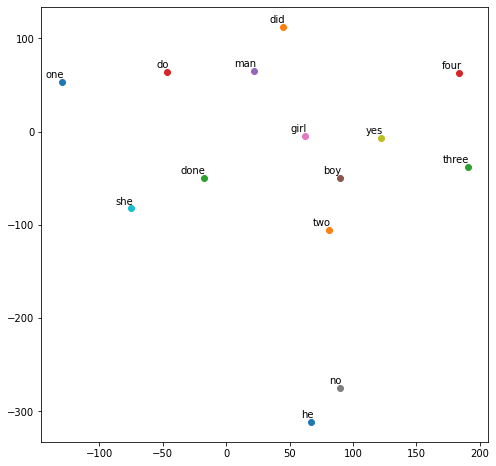

In [241]:
tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
coordinates = tsne_model.fit_transform(word2vecs)

x = []
y = []
for value in coordinates:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(8,8)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                  xy=(x[i], y[i]),
                  xytext=(2, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.show()